### 데이터 준비하기

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [14]:
iris = load_iris()
X = iris.data
y = iris.target

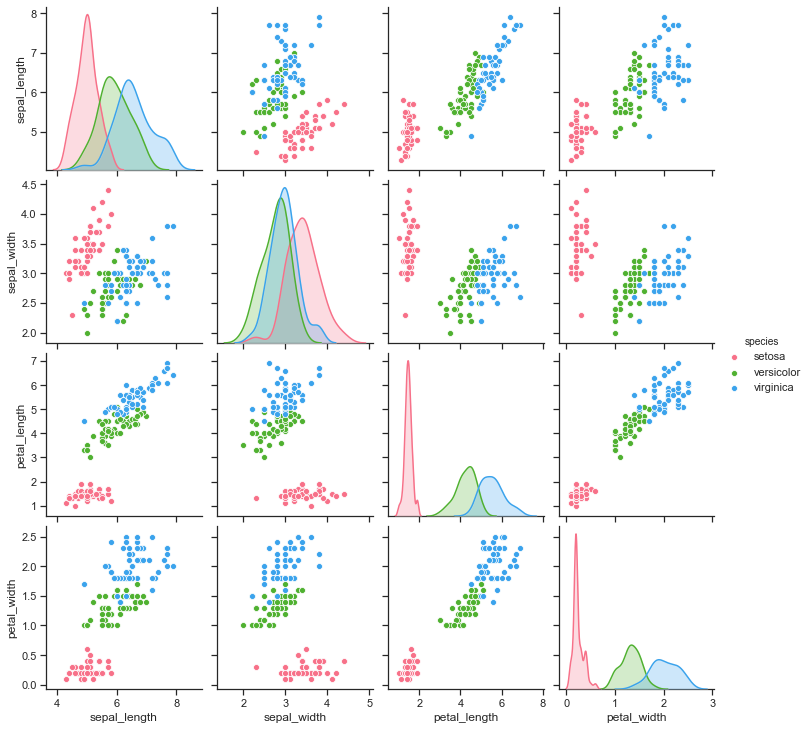

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks", color_codes = True)
iris2 = sns.load_dataset("iris")
g = sns.pairplot(iris2, hue ="species", palette ="husl")

In [15]:
# 원핫인코딩
label_df = pd.DataFrame(y.astype(np.str))
y = pd.get_dummies(label_df)
y.columns = iris.target_names

In [16]:
y

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,                 # 파라미터 여러가지를 배웠습니다. 기억나시나요?
                                                 random_state = 0,    # 해당 함수를 적용할 때 마다 동일한 난수가 발생할 수 있도록 지정 0 : NO  1 : Yes
                                                 train_size = 0.7,   # 훈련 데이터의 크기
                                                 test_size = 0.3,    # test 데이터의 크기
                                                 shuffle = True,     # 셔플의 설정 여부  
                                                 stratify = y)       # default = None, 훈련/테스트 데이터들이 원래의 클래스 비율과 같은 비율을 가지도록 할것인가?
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 3)
(45, 3)


### 신경망 모델 MLP 구성하기
- 여러분이 직접 작성해서 학습 해보도록 합시다
- 출력층의 활성화함수, 퍼셉트론의 개수
- 손실함수,옵티마이저
- 평가방법을 정확도

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dense()

Dense 클래스를 이용하여 레이어의 노드를 만드는데, Sequentioal 모델에 추가하면 다른 노드들과 연결된다

즉, 입출력 레이어를 모두 연결해주는 것이 Dense Layer이다



모델을 추가하는 방식에 대해서 조금 더 설명을 한다

model.add(Dense(2, input_dim=2)) : 레이어의 수를 2개로 두고, 그 노드에 입력 값을 2개로 사용한다는 것

model.add(Dense(5, input_dim=3)) : 레이어의 수를 5개로 두고, 그 노드에 입력 값을 3개로 사용한다는 것

model.add(Dense(1)) : 레이어의 수를 1개로 두는데, 입력 값으로는 이전 층의 결과들을 사용한다는 것

model2.add(Dense(2, input_dim=2)) : 이렇게 두개를 하면 아래 그림처럼 된다


In [68]:
model = Sequential()
model.add(Dense(8,input_dim=4,activation='sigmoid')) # 레이어의 수를 8개로 두고 입력 값은 4개로 구성하며, 활성화 함수는 sigmoid를 사용
model.add(Dense(3,activation='softmax'))             # 여러개의 결과값을 얻기위한 함수는?  -> 여러개의 품종 클래스에 대한 분류값을 예측하기 위해 softmax 함수를 활성화 함수로 사용

model.compile(loss='categorical_crossentropy',       # 손실함수는 어떤거 써야하죠?  카테고리컬 크로스 엔트로피 사용
              optimizer='sgd',                      # 가장 좋은 최적화 방법은 아담이죠?
              metrics=['accuracy'])                  # 분류문제이기 때문에 정확도를 보면 되겠죠? 그래서 "어큐레이시"를 사용합니다.

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


### 왜 아웃풋 셰입의 갯수는 8일까요?
### 우리가 첫번째 노드를 8로 설정했습니다.
###  파라미터는 왜 40개 일까요?
###  수식을 써보세요. 4* 8+ 8이다.
###  W = 4 * 8
###  B =  8

In [70]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [112]:
cb_early_stopping = EarlyStopping( monitor ='val_loss', verbose = 1, patience = 1,  baseline=0.4, mode = 'min')

### keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

- monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
- patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습일 종료합니다.
- verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
- mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
>- auto : 관찰하는 이름에 따라 자동으로 지정합니다.
>- min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
>- max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.

### Earlystopping 클래스의 구성 요소

- Performance measure: 어떤 성능을 monitoring 할 것인가?
- Trigger: 언제 training 을 멈출 것인가?

아래와 같이 지정하면 validation set 의 loss 를 monitoring 한다는 뜻이다. 



es = EarlyStopping(monitor='val_loss')



만약 performance measure가 최소화 시켜야하는 것이면 mode를 min 으로, 최대화 시켜야하는 것이면 mode를 max로 지정한다. loss 의 경우, 최소화 시키는 방향으로 training 이 진행되므로 min 을 지정한다. 



es = EarlyStopping(monitor='val_loss', mode='min')



mode 의 default 는 auto 인데, 이는 keras 에서 알아서 min, max 를 선택하게 된다. 여기까지가 가장 기본적인 Early stopping 의 사용법이다. performance measure를 정의하고, 이것을 최대화 할지, 최소화 할지를 지정하는 것이다. 그러면 keras 에서 알아서 적절한 epoch 에서 training 을 멈춘다. verbose=1 로 지정하면, 언제 keras 에서 training 을 멈추었는지를 화면에 출력할 수 있다. 



성능이 증가하지 않는다고, 그 순간 바로 멈추는 것은 효과적이지않을 수 있다. patience 는 성능이 증가하지 않는 epoch 을 몇 번이나 허용할 것인가를 정의한다. partience 는 다소 주관적인 기준이다. 사용한 데이터와 모델의 설계에 따라 최적의 값이 바뀔 수 있다. 



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)



만약 performance measure 를 practical 하게 설정한 경우 성능의 증가의 기준을 직접 정의할 수 있다. 예를 들어 아래 코드는 validation accuracy 가 1% 증가하지 않는 경우, 성능의 증가가 없다고 정의한다. 



특정값에 도달했을 때, 더 이상 training 이 필요하지 않은 경우가 있다. 이 경우 baseline 파라미터를 통해 정의할 수 있다. 



es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.4)



최종적으로 mode.fit 함수의 callback 으로 early stopping 객체를 넣어주면 early stopping 을 적용할 수 있다. 



hist = model.fit(train_x, train_y, nb_epoch=10,  

                 batch_size=10, verbose=2, validation_split=0.2,   

                 callbacks=[early_stopping])  
                 
https://tykimos.github.io/2017/07/09/Early_Stopping/

### Model Choice



Early stopping 객체에 의해 트레이닝이 중지되었을 때, 그 상태는 이전 모델에 비해 일반적으로 validation error 가 높은 상태일 것이다. 따라서, Earlystopping 을 하는 것은 특정 시점에 모델의 트레이닝을 멈춤으로써, 모델의 validation error 가 더 이상 낮아지지 않도록 조절할 수는 있겠지만, 중지된 상태가 최고의 모델은 아닐 것이다. 따라서 가장 validation performance 가 좋은 모델을 저장하는 것이 필요한데, keras 에서는 이를 위해 ModelCheckpoint 라고 하는 객체를 존재한다. 이 객체는 validation error 를 모니터링하면서, 이전 epoch 에 비해 validation performance 가 좋은 경우, 무조건 이 때의 parameter 들을 저장한다. 이를 통해 트레이닝이 중지되었을 때, 가장 validation performance 가 높았던 모델을 반환할 수 있다. 



from keras.callbacks import ModelCheckpoint



mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)



위 ModelCheckpoint instance를 callbacks 파라미터에 넣어줌으로써, 가장 validation performance 가 좋았던 모델을 저장할 수 있게된다.



hist = model.fit(train_x, train_y, nb_epoch=10,  

                 batch_size=10, verbose=2, validation_split=0.2,   

                 callbacks=[early_stopping, mc])  



출처: https://3months.tistory.com/424 [Deep Play]

In [113]:
history = model.fit(X_train,y_train, validation_split= 0.25, epochs=5000, batch_size = 16, verbose = 1, callbacks = [cb_early_stopping])
# epochs = 5000번 훈련한다. batch_size = 한번에 16개씩 훈련한다.

Epoch 1/5000
5/5 [==============================] - 0s 7ms/step - loss: 0.0866 - accuracy: 0.9872 - val_loss: 0.1175 - val_accuracy: 0.9259
Epoch 2/5000
5/5 [==============================] - 0s 8ms/step - loss: 0.0868 - accuracy: 0.9872 - val_loss: 0.1165 - val_accuracy: 0.9259
Epoch 3/5000
5/5 [==============================] - 0s 7ms/step - loss: 0.0867 - accuracy: 0.9872 - val_loss: 0.1182 - val_accuracy: 0.9259
Epoch 00003: early stopping


In [73]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 1.0000


[0.05606064200401306, 1.0]

### evaluate 결과
0.021 <- loss값  평가점수 -> 1.0  (과대적합)

In [74]:
model.predict(X_test)

array([[9.81739640e-01, 1.79630630e-02, 2.97298568e-04],
       [9.80007350e-01, 1.96288489e-02, 3.63757455e-04],
       [9.24737193e-04, 8.07866752e-02, 9.18288529e-01],
       [1.82979682e-04, 1.63444430e-02, 9.83472586e-01],
       [1.61209889e-02, 9.76864755e-01, 7.01427506e-03],
       [1.87994668e-03, 1.67099118e-01, 8.31020951e-01],
       [1.13585768e-02, 8.73014450e-01, 1.15627006e-01],
       [9.80472863e-01, 1.91984195e-02, 3.28747061e-04],
       [5.69044671e-04, 5.35441265e-02, 9.45886850e-01],
       [1.21659758e-02, 8.91286373e-01, 9.65476111e-02],
       [3.39694379e-04, 2.90408228e-02, 9.70619500e-01],
       [9.79456365e-01, 2.01848410e-02, 3.58798978e-04],
       [9.49038134e-04, 8.11810717e-02, 9.17869925e-01],
       [9.76439357e-01, 2.31336914e-02, 4.26926359e-04],
       [1.67549998e-02, 9.76782262e-01, 6.46278914e-03],
       [9.78141129e-01, 2.15063021e-02, 3.52508418e-04],
       [5.32063423e-03, 5.36176145e-01, 4.58503217e-01],
       [1.70868281e-02, 9.76099

In [75]:
model.predict_classes(X_test)

array([0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2,
       0], dtype=int64)

In [76]:
print(history.history)

{'loss': [1.2448091506958008, 1.223413348197937, 1.2068212032318115, 1.1941099166870117, 1.1823934316635132, 1.1741739511489868, 1.1672343015670776, 1.1609690189361572, 1.155963659286499, 1.1519603729248047, 1.1472899913787842, 1.1430187225341797, 1.1410365104675293, 1.1374859809875488, 1.1351048946380615, 1.1322792768478394, 1.1297144889831543, 1.12723970413208, 1.1260510683059692, 1.1231557130813599, 1.120463490486145, 1.119242787361145, 1.116356611251831, 1.1151111125946045, 1.112896203994751, 1.1109871864318848, 1.1084537506103516, 1.108086109161377, 1.105485200881958, 1.1034988164901733, 1.1018147468566895, 1.0993571281433105, 1.0987824201583862, 1.095874309539795, 1.0944559574127197, 1.0928658246994019, 1.0901309251785278, 1.0884661674499512, 1.0867602825164795, 1.0854284763336182, 1.083863377571106, 1.0821870565414429, 1.0796549320220947, 1.0783741474151611, 1.0769574642181396, 1.0742676258087158, 1.0724914073944092, 1.0710326433181763, 1.0706697702407837, 1.0677179098129272, 1.

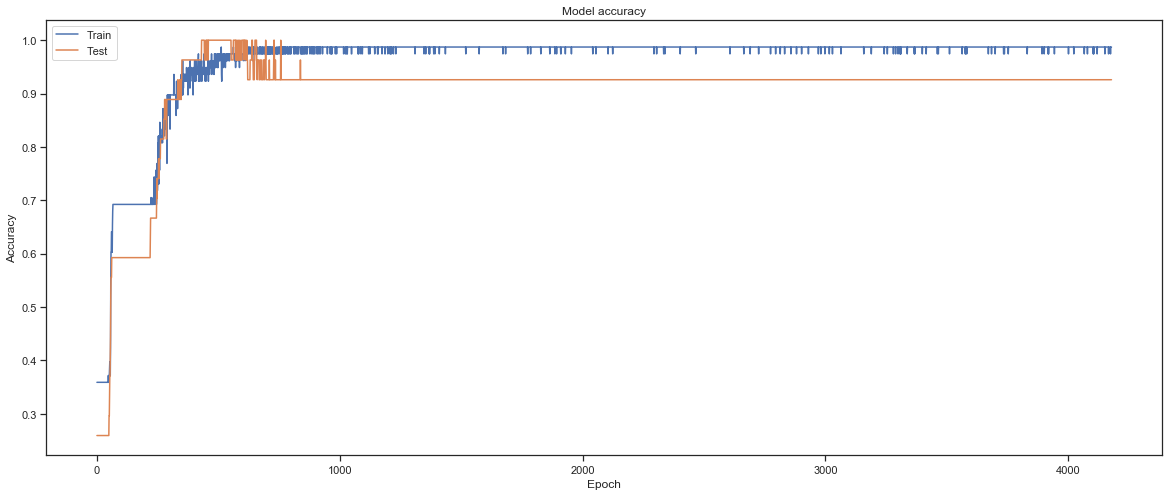

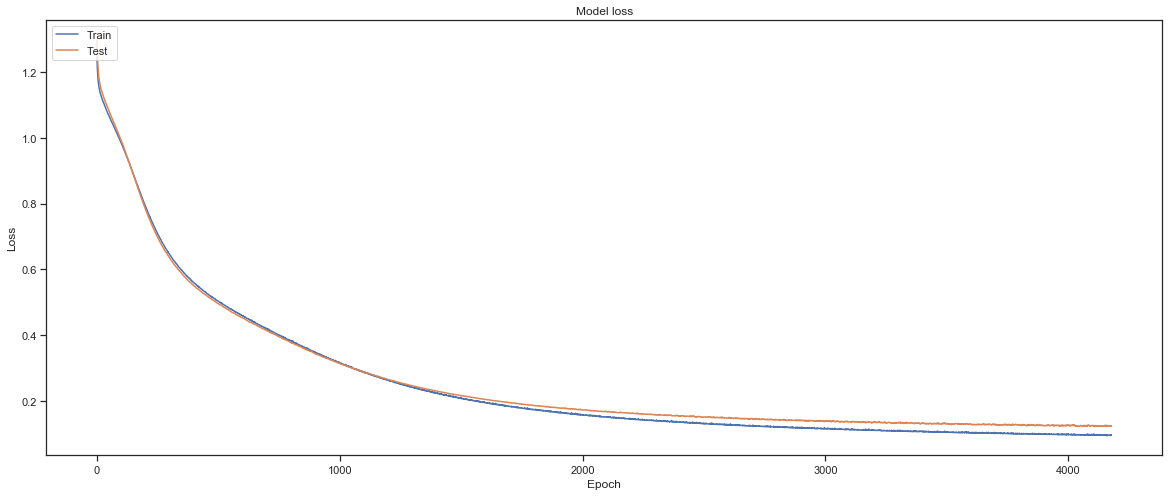

In [81]:
plt.figure( figsize=[20,8])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.figure( figsize=[20,8])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

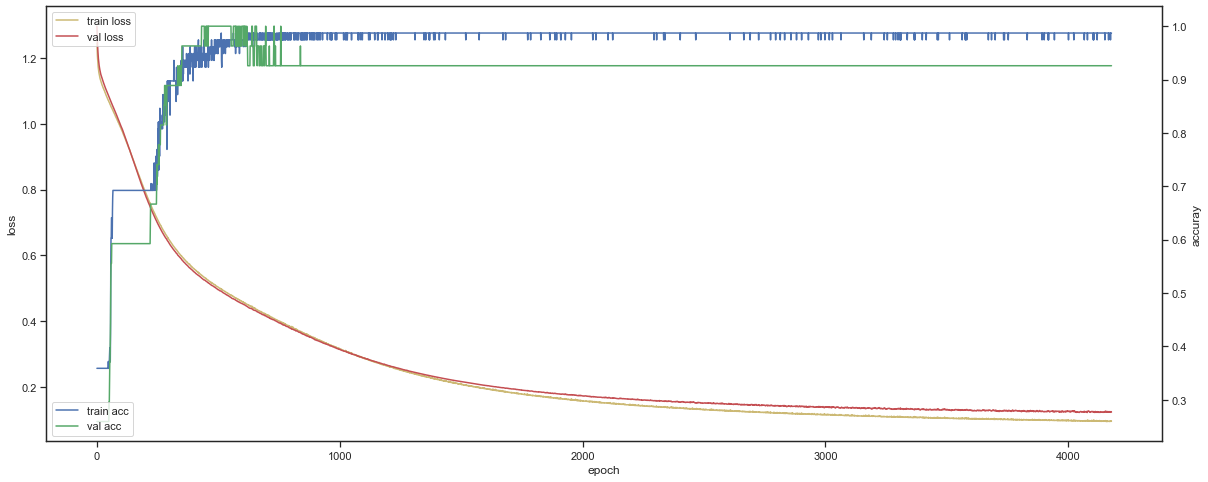

In [85]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=[20,8])

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()